# Other Clustering Methods
In this assignment, we'll explore clustering algorithms beyond k -means: __mean-shift__, __spectral clustering__, and __affinity propagation__. We'll introduce and explain each one in turn and follow it up with an example.

Each example will use the same simulated dataset containing 3 blobs of points.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline

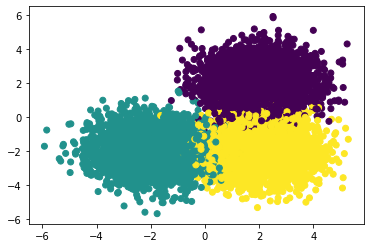

In [2]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Mean-shift
Mean Shift is very similar to the K-Means algorithm, except for one very important factor: you do not need to specify the number of groups prior to training. The Mean Shift algorithm finds clusters on its own. For this reason, it is even more of an "unsupervised" machine learning algorithm than K-Means.

The way Mean Shift works is to go through each featureset (a datapoint on a graph), and proceed to do a hill climb operation. Hill Climbing is just as it sounds: The idea is to continually increase, or go up, until you cannot anymore. We don't have for sure just one local maximal value. We might have only one, or we might have ten. Our "hill" in this case will be the number of featuresets/datapoints within a given radius. The radius is also called a bandwidth, and the entire window is your Kernel. The more data within the window, the better. Once we can no longer take another step without decreasing the number of featuresets/datapoints within the radius, we take the mean of all data in that region and we have located a cluster center. We do this starting from each data point. Many data points will lead to the same cluster center, which should be expected, but it is also possible that other data points will take you to a completely separate cluster center.

Mean shift makes no assumption about the nature of the data nor the number of clusters. In fact, some points may not end up clustered at all. This would happen if the points start out in a very flat portion of the probability surface.

One critical user parameter, bandwidth, defines the smoothness of the starting probability surface. A high bandwith (up to 1) will create a smoother surface and a low bandwith (down to 0).

While mean-shift is a good clustering algorithm if you don't know how many clusters to expect, or if you know your clusters are heterogeneous in size and/or shape, it is a computationally expensive algorithm. Thus, it is best left for small to medium-sized datasets only.

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
#y_pred = ms.fit_predict(X_test)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


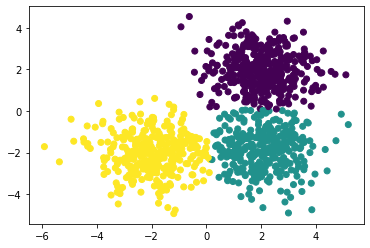

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

In [5]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
y_pred = ms.fit_predict(X_test)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


In [6]:
print('Comparing the y_test and y_pred')
print(pd.crosstab(y_test, y_pred))

Comparing the y_test and y_pred
col_0     0     1     2
row_0                  
0         3    75  2894
1      2943    65     5
2        81  2876    58


The clustering algorithm appears to be performing well. 

## Spectral  clustering
Spectral clustering is based on quantifying the similarity between data points. Any measure of similarity can be selected by the user, but common measures are nearest neighbor and the radial basis function (or Gaussian kernal of the Euclidean distance). The only necessity is that the function computes pairwise similarity with 0 meaning no similarity and higher numbers indicating greater similarity.

This clustering alogrithm defines a similarity matrix of n x n dimensions, where n is the number of samples in the data set, and each value represents the indices of similarity for every pairwise combination of points. Then, a transformation matrix is applied to calculate a set of eigenvectors with appropriate eigenvalues. In other words, this is PCA but done on a similarity matrix instead of a covariance matrix.

The number of clusters, k , is user defined. The PCA-like step will output the k eigenvectors with the k largest eigenvalues, extracted and converted to the new k -dimensional space. Following the dimensionality reduction, the k -means algorithm is applied to extract the k clusters.

Similar to k -means, spectral clustering is slow and works best when the clusters are equal in size. However, unlike k -means, it can identify clusters with non-flat geometry and clusters that are not necessarily globlar in the original dimensional space.

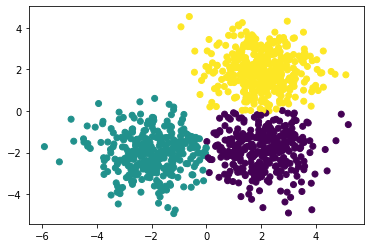

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5    0  357
1        9  310    1
2      306    5    7


In [7]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
y_sc_pred = sc.fit_predict(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [8]:
print('Comparing the y_test and y_pred')
print(pd.crosstab(y_train, y_sc_pred))

Comparing the y_test and y_pred
col_0    0    1    2
row_0               
0        0  357    5
1      310    1    9
2        5    7  306


These outcomes are similar to mean-shift.

## Affinity propagation
It's complex, computationally expensive, and memory intensive. The SKlearn documenation is much clearer than the Thinkful documentation.

In [9]:
from sklearn.cluster import AffinityPropagation

# Providing no arguments to see what the defaults produce
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the model information
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print(f'Estimated number of clusters: {n_clusters_}')

Done
Estimated number of clusters: 93


Well since we didn't supply any arguments, the Affinity Propagation clustering algorithm went wild. Let's see what it actually produced before we attempt to reign it in.

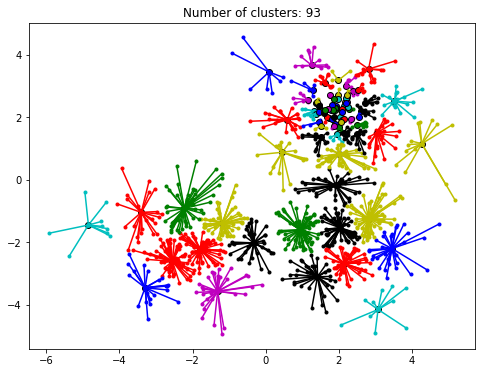

In [10]:
from itertools import cycle

plt.figure(1, figsize=(8,6))
plt.clf()

# Cycle through each cluster, graph the exemplar as a point and lines
# connecting each point to it's exemplar
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0], 
             cluster_center[1], 
             'o', 
             markerfacecolor=col, 
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title(f'Number of clusters: {n_clusters_}')
plt.show()

Let's try to make it behave within reason.

In [11]:
# Changing the Affinity Propagation arguments
# Very high damping effect
af = AffinityPropagation(damping=.98505).fit(X_train)

# Pull the model information
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print(f'Estimated number of clusters: {n_clusters_}')

Estimated number of clusters: 3


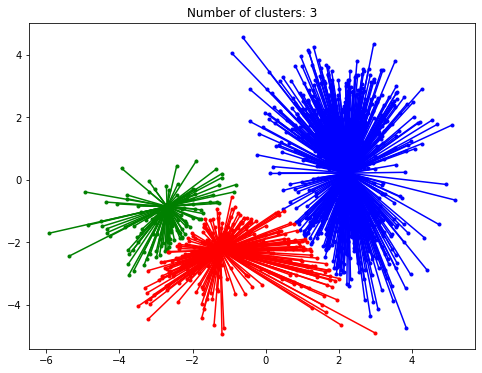

In [12]:
from itertools import cycle

plt.figure(1, figsize=(8,6))
plt.clf()

# Cycle through each cluster, graph the exemplar as a point and lines
# connecting each point to it's exemplar
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0], 
             cluster_center[1], 
             'o', 
             markerfacecolor=col, 
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title(f'Number of clusters: {n_clusters_}')
plt.show()

In [13]:
# Changing the Affinity Propagation arguments
# Default damping, invoking preference
af = AffinityPropagation(damping=.985, max_iter=10000, verbose=True).fit(X_train)

# Pull the model information
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print(f'Estimated number of clusters: {n_clusters_}')

Converged after 264 iterations.
Estimated number of clusters: 20


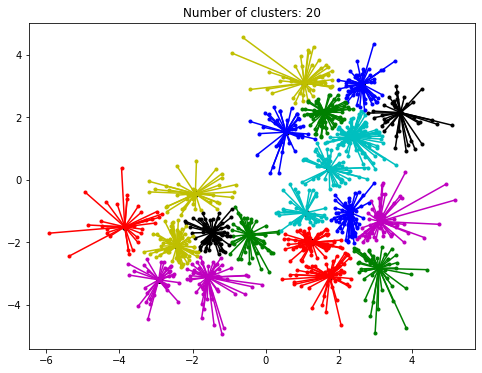

In [14]:
from itertools import cycle

plt.figure(1, figsize=(8,6))
plt.clf()

# Cycle through each cluster, graph the exemplar as a point and lines
# connecting each point to it's exemplar
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0], 
             cluster_center[1], 
             'o', 
             markerfacecolor=col, 
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title(f'Number of clusters: {n_clusters_}')
plt.show()